In [1]:
#To do lambdaの外部入力
using SparseIR
using PyPlot
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
rcParams["font.size"] = 16
rcParams["text.latex.preamble"] = raw"\usepackage{amsmath}"
using LinearAlgebra
using Revise
using Optim
using FFTW
using Zygote
include("./src/Nevanlinna.jl")

Main.Nevanlinna

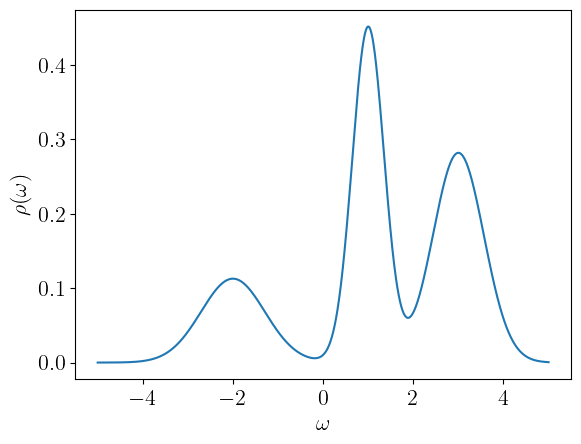

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f026ce92130>

In [2]:
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)

#on-centered gaussian
#rho(omega) = gaussian(omega, 0.0, 0.15)  

#rho(omega) = gaussian(omega, 1.0, 0.15) +
#    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

rho(omega) = 0.4*gaussian(omega, 1.0, 0.5) + 
    0.4*gaussian(omega, 3.0, 0.8) + 0.2*gaussian(omega, -2.0, 1.0) 

######

#rho(omega) = 0.5*gaussian(omega, -3.0, 1.0) + 0.5*gaussian(omega, 3.0, 1.0) 

#off-centered gaussian
#rho(omega) = gaussian(omega, 0.2, 0.05) 

omegas = LinRange(-5, 5, 1000)
plt.xlabel(L"\omega")
plt.ylabel(L"\rho(\omega)")
plt.plot(omegas, rho.(omegas))

In [3]:
beta = 100
wmax = 1000
IR_basis_set = FiniteTempBasisSet(Float64(beta), Float64(wmax), 1e-15) #もともと-7
#basis = FiniteTempBasis(fermion, beta, wmax, 1e-7)

rhol = [overlap(IR_basis_set.basis_f.v[l], rho) for l in 1:length(IR_basis_set.basis_f)]
gl = - IR_basis_set.basis_f.s .* rhol
;
#=
plt.semilogy(abs.(rhol), marker="o", label=L"|\rho_l|")
plt.semilogy(abs.(gl), marker="x", label=L"|g_l|")
plt.xlabel(L"l")
plt.ylim([1e-5, 1])
#plt.legend()
=#

In [4]:
gw = evaluate(IR_basis_set.smpl_wn_f, gl)
hnw = Int64(length(IR_basis_set.smpl_wn_f.sampling_points)/2)

71

In [5]:
setprecision(128)
;

In [6]:
test_gw   = Array{Complex{BigFloat}}(undef, hnw) 
test_smpl = Array{BigFloat}(undef, hnw) 
;

In [7]:
for i in 1:hnw
    test_smpl[i]= parse(BigFloat, string(IR_basis_set.smpl_wn_f.sampling_points[hnw+i]*pi/beta))
    test_gw[i]  = parse(BigFloat, string(real(gw[hnw+i]))) + parse(BigFloat, string(imag(gw[hnw+i])))*im
end

In [ ]:
N_real    =  6000
omega_max =  10.0
eta       =  0.001
H         =  25
N_imag    =  Nevanlinna.calc_opt_N_imag(hnw, test_smpl, test_gw)
#N_imag = 71
@time result    = Nevanlinna.Nevanlinna_Schur(N_imag, test_smpl, test_gw, N_real, omega_max, eta, H, true)
opt_real = result[2]
;

N_imag is setted as 31
Pick matrix is positive semi-definite.
Iter     Function value   Gradient norm 
     0     7.237505e-02     6.544814e-01
 * time: 0.043515920639038086
     1     4.548229e-02     2.642441e-01
 * time: 17.423166036605835
     2     3.056742e-02     1.852098e-01
 * time: 27.64098596572876
     3     2.253926e-02     2.034825e-01
 * time: 38.33297896385193
     4     2.129734e-02     2.095906e-01
 * time: 44.73574900627136
     5     1.694476e-02     1.652995e-01
 * time: 52.4000940322876
     6     1.161360e-02     1.389673e-01
 * time: 59.104411125183105
     7     8.072445e-03     1.236516e-01
 * time: 66.64570903778076
     8     4.455090e-03     6.495998e-02
 * time: 74.27899312973022
     9     2.951839e-03     2.634591e-02
 * time: 80.72952198982239
    10     2.366113e-03     4.413156e-02
 * time: 88.35273003578186
    11     1.811595e-03     2.791700e-02
 * time: 95.92963194847107
    12     1.328737e-03     1.838006e-02
 * time: 106.76196908950806
    13  

   119     4.102591e-05     1.809757e-04
 * time: 1035.7876579761505
   120     4.082473e-05     8.907892e-05
 * time: 1043.4745450019836
   121     4.061230e-05     1.763886e-04
 * time: 1050.5332911014557
   122     4.041630e-05     9.967551e-05
 * time: 1057.704647064209
   123     4.020285e-05     1.765948e-04
 * time: 1064.6305351257324
   124     4.000465e-05     1.034304e-04
 * time: 1072.357157945633
   125     3.978189e-05     1.814664e-04
 * time: 1078.8421559333801
   126     3.957524e-05     1.010143e-04
 * time: 1086.5377230644226
   127     3.933805e-05     1.891594e-04
 * time: 1093.5165679454803
   128     3.912156e-05     1.047086e-04
 * time: 1100.6688830852509
   129     3.887225e-05     1.962594e-04
 * time: 1107.5195770263672
   130     3.865264e-05     1.055601e-04
 * time: 1115.1381800174713
   131     3.840352e-05     1.984787e-04
 * time: 1121.6310839653015
   132     3.819590e-05     1.030472e-04
 * time: 1129.0593960285187
   133     3.796741e-05     1.919964

   239     2.972760e-05     1.032512e-04
 * time: 2072.621218919754
   240     2.969289e-05     3.476827e-05
 * time: 2079.0079250335693
   241     2.966060e-05     9.516201e-05
 * time: 2085.8099060058594
   242     2.963120e-05     3.412765e-05
 * time: 2091.827064037323
   243     2.960316e-05     8.805967e-05
 * time: 2098.8813059329987
   244     2.957744e-05     3.062092e-05
 * time: 2105.8261799812317
   245     2.955197e-05     8.239781e-05
 * time: 2112.3254520893097
   246     2.952698e-05     2.701606e-05
 * time: 2118.693624973297
   247     2.950013e-05     8.159597e-05
 * time: 2125.633157968521
   248     2.947231e-05     3.408959e-05
 * time: 2132.35853099823
   249     2.944262e-05     8.169461e-05
 * time: 2138.888067960739
   250     2.941298e-05     3.499565e-05
 * time: 2146.052029132843
   251     2.938372e-05     7.884983e-05
 * time: 2152.688143014908
   252     2.935654e-05     2.921239e-05
 * time: 2160.077024936676
   253     2.933173e-05     7.365974e-05
 * 

   359     2.733681e-05     7.553975e-05
 * time: 2922.4900550842285
   360     2.731442e-05     2.977482e-05
 * time: 2929.2109229564667
   361     2.729334e-05     7.458306e-05
 * time: 2936.589194059372
   362     2.727198e-05     2.766725e-05
 * time: 2943.660304069519
   363     2.725218e-05     7.341732e-05
 * time: 2950.158793926239
   364     2.723210e-05     2.501553e-05
 * time: 2957.511594057083
   365     2.721375e-05     7.226776e-05
 * time: 2964.7821679115295
   366     2.719500e-05     2.431848e-05
 * time: 2971.8061549663544
   367     2.717804e-05     7.134924e-05
 * time: 2979.1699719429016
   368     2.716043e-05     2.485024e-05
 * time: 2985.5699949264526
   369     2.714463e-05     7.082319e-05
 * time: 2992.992486000061
   370     2.712782e-05     2.537799e-05
 * time: 3000.007961034775
   371     2.711282e-05     7.076241e-05
 * time: 3007.230983018875
   372     2.709640e-05     2.584899e-05
 * time: 3014.1810479164124
   373     2.708186e-05     7.113565e-05


   479     2.407813e-05     2.860598e-05
 * time: 3935.3714859485626
   480     2.406484e-05     2.234691e-05
 * time: 3945.521481990814
   481     2.405432e-05     2.320448e-05
 * time: 3955.910677909851
   482     2.403976e-05     4.157237e-05
 * time: 3966.4171991348267
   483     2.402586e-05     3.805645e-05
 * time: 3977.032014131546
   484     2.400193e-05     4.481704e-05
 * time: 3987.220051050186
   485     2.397558e-05     4.489410e-05
 * time: 3994.9917409420013
   486     2.394118e-05     5.936897e-05
 * time: 4002.0565481185913
   487     2.390590e-05     5.215416e-05
 * time: 4010.5754029750824
   488     2.386949e-05     5.777498e-05
 * time: 4017.494525909424
   489     2.383591e-05     5.001728e-05
 * time: 4025.0195500850677
   490     2.380530e-05     5.002556e-05
 * time: 4032.881520986557
   491     2.377956e-05     4.214511e-05
 * time: 4040.159516096115
   492     2.375776e-05     4.115157e-05
 * time: 4047.4857029914856
   493     2.373999e-05     3.403659e-05


   600     2.304119e-05     3.102893e-05
 * time: 4719.671674966812
   601     2.303704e-05     1.522358e-05
 * time: 4724.874521017075
   602     2.303270e-05     3.164849e-05
 * time: 4730.134222984314
   603     2.302846e-05     1.503498e-05
 * time: 4735.34578204155
   604     2.302402e-05     3.227579e-05
 * time: 4740.805977106094
   605     2.301969e-05     1.483920e-05
 * time: 4746.071777105331
   606     2.301516e-05     3.290994e-05
 * time: 4750.854079961777
   607     2.301073e-05     1.463831e-05
 * time: 4756.225955963135
   608     2.300609e-05     3.354974e-05
 * time: 4761.365557909012
   609     2.300156e-05     1.443177e-05
 * time: 4766.361438035965
   610     2.299682e-05     3.419397e-05
 * time: 4771.383043050766
   611     2.299220e-05     1.421664e-05
 * time: 4776.69339299202
   612     2.298734e-05     3.484202e-05
 * time: 4781.396359920502
   613     2.298263e-05     1.398811e-05
 * time: 4786.773124933243
   614     2.297768e-05     3.549487e-05
 * time: 

   721     2.234505e-05     2.959675e-05
 * time: 5346.836102962494
   722     2.234371e-05     1.262308e-05
 * time: 5351.67902302742
   723     2.234246e-05     2.876387e-05
 * time: 5356.545512914658
   724     2.234120e-05     1.198439e-05
 * time: 5361.653989076614
   725     2.234002e-05     2.795679e-05
 * time: 5366.498162031174
   726     2.233883e-05     1.120290e-05
 * time: 5370.9893000125885
   727     2.233772e-05     2.718856e-05
 * time: 5375.933917999268
   728     2.233659e-05     1.028776e-05
 * time: 5380.777060985565
   729     2.233554e-05     2.646396e-05
 * time: 5385.41618013382
   730     2.233447e-05     9.451597e-06
 * time: 5390.477267980576
   731     2.233348e-05     2.578268e-05
 * time: 5395.00802898407
   732     2.233244e-05     9.288366e-06
 * time: 5399.685423135757
   733     2.233150e-05     2.514183e-05
 * time: 5404.516767024994
   734     2.233050e-05     9.073070e-06
 * time: 5409.237364053726
   735     2.232960e-05     2.453768e-05
 * time: 

   842     2.206080e-05     2.627767e-05
 * time: 5961.3532791137695
   843     2.205871e-05     7.051951e-06
 * time: 5966.31614112854
   844     2.205658e-05     2.640355e-05
 * time: 5971.20129609108
   845     2.205443e-05     7.517522e-06
 * time: 5976.37749505043
   846     2.205224e-05     2.657973e-05
 * time: 5981.245815992355
   847     2.205002e-05     7.865677e-06
 * time: 5985.908112049103
   848     2.204776e-05     2.678653e-05
 * time: 5990.923478126526
   849     2.204546e-05     8.064890e-06
 * time: 5995.7558670043945
   850     2.204313e-05     2.700114e-05
 * time: 6000.419986963272
   851     2.204075e-05     8.109615e-06
 * time: 6005.57098197937
   852     2.203834e-05     2.720430e-05
 * time: 6010.048413038254
   853     2.203590e-05     8.013169e-06
 * time: 6014.793652057648
   854     2.203342e-05     2.738370e-05
 * time: 6019.319617033005
   855     2.203092e-05     7.802459e-06
 * time: 6024.301059007645
   856     2.202839e-05     2.753451e-05
 * time: 

   963     2.185660e-05     1.075213e-05
 * time: 6545.611563920975
   964     2.185584e-05     2.139454e-05
 * time: 6550.720961093903
   965     2.185507e-05     1.074931e-05
 * time: 6555.839131116867
   966     2.185429e-05     2.146343e-05
 * time: 6560.693438053131
   967     2.185351e-05     1.078287e-05
 * time: 6565.491380929947
   968     2.185271e-05     2.154893e-05
 * time: 6570.488431930542
   969     2.185192e-05     1.085005e-05
 * time: 6575.037050962448
   970     2.185111e-05     2.165009e-05
 * time: 6580.112800121307
   971     2.185030e-05     1.094526e-05
 * time: 6585.00212097168
   972     2.184948e-05     2.176492e-05
 * time: 6589.919130086899
   973     2.184865e-05     1.106065e-05
 * time: 6594.507494926453
   974     2.184781e-05     2.189052e-05
 * time: 6599.580158948898
   975     2.184696e-05     1.118674e-05
 * time: 6604.051748991013
   976     2.184610e-05     2.202329e-05
 * time: 6609.082556009293
   977     2.184523e-05     1.131323e-05
 * time:

  1084     2.173008e-05     2.306973e-05
 * time: 7147.082591056824
  1085     2.172917e-05     8.213837e-06
 * time: 7152.64785194397
  1086     2.172827e-05     2.300466e-05
 * time: 7158.645847082138
  1087     2.172737e-05     8.228614e-06
 * time: 7164.362174034119
  1088     2.172647e-05     2.293600e-05
 * time: 7169.608002901077
  1089     2.172557e-05     8.242992e-06
 * time: 7174.132863998413
  1090     2.172468e-05     2.286392e-05
 * time: 7179.134382009506
  1091     2.172379e-05     8.256283e-06
 * time: 7183.9993019104
  1092     2.172290e-05     2.278901e-05
 * time: 7188.705147981644
  1093     2.172202e-05     8.267723e-06
 * time: 7193.776257991791
  1094     2.172113e-05     2.271225e-05
 * time: 7198.390797138214
  1095     2.172025e-05     8.276522e-06
 * time: 7203.391122102737
  1096     2.171937e-05     2.263495e-05
 * time: 7208.218698978424
  1097     2.171850e-05     8.281906e-06
 * time: 7212.926065921783
  1098     2.171762e-05     2.255864e-05
 * time: 7

  1205     2.162456e-05     8.163496e-06
 * time: 7760.198266983032
  1206     2.162396e-05     1.892609e-05
 * time: 7764.906853914261
  1207     2.162336e-05     8.216045e-06
 * time: 7770.223994016647
  1208     2.162277e-05     1.881460e-05
 * time: 7775.7552490234375
  1209     2.162220e-05     8.266714e-06
 * time: 7781.673299074173
  1210     2.162162e-05     1.870132e-05
 * time: 7787.496663093567
  1211     2.162105e-05     8.314894e-06
 * time: 7792.752382993698
  1212     2.162049e-05     1.858653e-05
 * time: 7797.439651966095
  1213     2.161994e-05     8.360003e-06
 * time: 7802.239351987839
  1214     2.161939e-05     1.847064e-05
 * time: 7806.766643047333
  1215     2.161885e-05     8.401519e-06
 * time: 7811.3402531147
  1216     2.161831e-05     1.835420e-05
 * time: 7815.3831350803375
  1217     2.161778e-05     8.439022e-06
 * time: 7821.512672901154
  1218     2.161725e-05     1.823788e-05
 * time: 7825.559792041779
  1219     2.161674e-05     8.472218e-06
 * time

  1326     2.156551e-05     1.575477e-05
 * time: 8370.432127952576
  1327     2.156499e-05     7.581276e-06
 * time: 8375.330698013306
  1328     2.156446e-05     1.574310e-05
 * time: 8380.279654979706
  1329     2.156394e-05     7.585751e-06
 * time: 8384.735624074936
  1330     2.156341e-05     1.573436e-05
 * time: 8389.297841072083
  1331     2.156288e-05     7.589950e-06
 * time: 8394.145230054855
  1332     2.156235e-05     1.572866e-05
 * time: 8398.715388059616
  1333     2.156182e-05     7.593960e-06
 * time: 8403.86221408844
  1334     2.156130e-05     1.572615e-05
 * time: 8410.032340049744
  1335     2.156077e-05     7.597927e-06
 * time: 8415.67194390297
  1336     2.156023e-05     1.572699e-05
 * time: 8421.488045930862
  1337     2.155970e-05     7.602049e-06
 * time: 8427.32544708252
  1338     2.155917e-05     1.573142e-05
 * time: 8433.240524053574
  1339     2.155864e-05     7.606574e-06
 * time: 8439.620609045029
  1340     2.155810e-05     1.573968e-05
 * time: 8

  1447     2.148758e-05     8.581366e-06
 * time: 8983.130638122559
  1448     2.148674e-05     2.130788e-05
 * time: 8988.71493601799
  1449     2.148589e-05     8.604232e-06
 * time: 8994.137565135956
  1450     2.148505e-05     2.139295e-05
 * time: 8998.713901996613
  1451     2.148421e-05     8.627847e-06
 * time: 9003.823638916016
  1452     2.148336e-05     2.147429e-05
 * time: 9008.707422018051
  1453     2.148252e-05     8.652225e-06
 * time: 9013.81321310997
  1454     2.148167e-05     2.155196e-05
 * time: 9018.423159122467
  1455     2.148082e-05     8.677378e-06
 * time: 9023.391505002975
  1456     2.147997e-05     2.162607e-05
 * time: 9027.882488012314
  1457     2.147912e-05     8.703322e-06
 * time: 9032.96190905571
  1458     2.147827e-05     2.169672e-05
 * time: 9037.676383972168
  1459     2.147742e-05     8.730072e-06
 * time: 9042.532128095627
  1460     2.147657e-05     2.176404e-05
 * time: 9047.20093202591
  1461     2.147572e-05     8.757646e-06
 * time: 90

  1568     2.138978e-05     2.375531e-05
 * time: 9626.849832057953
  1569     2.138905e-05     1.119903e-05
 * time: 9631.519479990005
  1570     2.138833e-05     2.372767e-05
 * time: 9636.420109033585
  1571     2.138761e-05     1.122352e-05
 * time: 9642.160187959671
  1572     2.138689e-05     2.369581e-05
 * time: 9646.990181922913
  1573     2.138618e-05     1.124620e-05
 * time: 9653.190608024597
  1574     2.138547e-05     2.365974e-05
 * time: 9658.447557926178
  1575     2.138476e-05     1.126707e-05
 * time: 9663.479145050049
  1576     2.138405e-05     2.361948e-05
 * time: 9668.59044098854
  1577     2.138335e-05     1.128615e-05
 * time: 9673.988193035126
  1578     2.138265e-05     2.357505e-05
 * time: 9678.838886976242
  1579     2.138196e-05     1.130343e-05
 * time: 9684.15848493576
  1580     2.138126e-05     2.352647e-05
 * time: 9688.691936969757
  1581     2.138057e-05     1.131890e-05
 * time: 9693.921994924545
  1582     2.137989e-05     2.347376e-05
 * time: 

  1689     2.132897e-05     9.130493e-06
 * time: 10218.685647964478
  1690     2.132866e-05     1.681385e-05
 * time: 10223.470834970474
  1691     2.132837e-05     9.037212e-06
 * time: 10228.700688123703
  1692     2.132806e-05     1.667566e-05
 * time: 10233.928291082382
  1693     2.132777e-05     8.943299e-06
 * time: 10238.997734069824
  1694     2.132747e-05     1.653895e-05
 * time: 10244.405272960663
  1695     2.132718e-05     8.848933e-06
 * time: 10250.059881925583
  1696     2.132689e-05     1.640384e-05
 * time: 10254.987066984177
  1697     2.132660e-05     8.754293e-06
 * time: 10260.27217411995
  1698     2.132631e-05     1.627046e-05
 * time: 10265.193243980408
  1699     2.132603e-05     8.659559e-06
 * time: 10269.902354955673
  1700     2.132573e-05     1.613889e-05
 * time: 10274.894762992859
  1701     2.132546e-05     8.564906e-06
 * time: 10279.362164974213
  1702     2.132517e-05     1.600924e-05
 * time: 10284.532956123352
  1703     2.132489e-05     8.47051

  1809     2.125229e-05     2.114022e-05
 * time: 10869.992274999619
  1810     2.125144e-05     1.292771e-05
 * time: 10875.223004102707
  1811     2.125061e-05     2.195396e-05
 * time: 10879.718441963196
  1812     2.124977e-05     1.303250e-05
 * time: 10884.954155921936
  1813     2.124894e-05     2.280678e-05
 * time: 10889.87319612503
  1814     2.124809e-05     1.314921e-05
 * time: 10894.7351770401
  1815     2.124725e-05     2.370438e-05
 * time: 10899.889172077179
  1816     2.124639e-05     1.329887e-05
 * time: 10904.584870100021
  1817     2.124554e-05     2.459749e-05
 * time: 10909.97762799263
  1818     2.124467e-05     1.347032e-05
 * time: 10914.989733934402
  1819     2.124381e-05     2.543428e-05
 * time: 10919.953428983688
  1820     2.124293e-05     1.363211e-05
 * time: 10924.803990125656
  1821     2.124206e-05     2.618504e-05
 * time: 10929.927056074142
  1822     2.124118e-05     1.375922e-05
 * time: 10934.549570083618
  1823     2.124030e-05     2.683890e-

  1929     2.117986e-05     1.361486e-05
 * time: 11496.67778301239
  1930     2.117974e-05     9.499757e-06
 * time: 11501.419469118118
  1931     2.117961e-05     1.346180e-05
 * time: 11506.85888504982
  1932     2.117948e-05     9.422115e-06
 * time: 11511.761084079742
  1933     2.117936e-05     1.330446e-05
 * time: 11516.772568941116
  1934     2.117923e-05     9.337258e-06
 * time: 11521.54310798645
  1935     2.117910e-05     1.314178e-05
 * time: 11527.139930009842
  1936     2.117897e-05     9.245335e-06
 * time: 11531.83080291748
  1937     2.117883e-05     1.297421e-05
 * time: 11537.227771997452
  1938     2.117870e-05     9.147375e-06
 * time: 11542.399332046509
  1939     2.117856e-05     1.280362e-05
 * time: 11547.628132104874
  1940     2.117842e-05     9.045096e-06
 * time: 11552.575860023499
  1941     2.117828e-05     1.263292e-05
 * time: 11557.976378917694
  1942     2.117814e-05     8.940664e-06
 * time: 11562.782061100006
  1943     2.117799e-05     1.246564e-

  2049     2.114902e-05     2.083020e-05
 * time: 12139.520466089249
  2050     2.114873e-05     1.288316e-05
 * time: 12144.701822042465
  2051     2.114846e-05     2.082619e-05
 * time: 12151.049437046051
  2052     2.114818e-05     1.290015e-05
 * time: 12156.23508810997
  2053     2.114791e-05     2.080109e-05
 * time: 12160.880602121353
  2054     2.114765e-05     1.290649e-05
 * time: 12165.294842004776
  2055     2.114738e-05     2.075613e-05
 * time: 12169.49669098854
  2056     2.114712e-05     1.290203e-05
 * time: 12174.429250955582
  2057     2.114687e-05     2.069267e-05
 * time: 12179.817507982254
  2058     2.114662e-05     1.288670e-05
 * time: 12184.947431087494
  2059     2.114637e-05     2.061222e-05
 * time: 12190.058448076248
  2060     2.114613e-05     1.286049e-05
 * time: 12195.091938018799
  2061     2.114589e-05     2.051637e-05
 * time: 12199.518592119217
  2062     2.114565e-05     1.282347e-05
 * time: 12204.936994075775
  2063     2.114541e-05     2.040678

  2168     2.112813e-05     1.110850e-05
 * time: 12783.286451101303
  2169     2.112798e-05     1.680321e-05
 * time: 12788.197638988495
  2170     2.112783e-05     1.112966e-05
 * time: 12793.009423971176
  2171     2.112768e-05     1.689736e-05
 * time: 12798.185555934906
  2172     2.112752e-05     1.114774e-05
 * time: 12804.030086040497
  2173     2.112737e-05     1.699365e-05
 * time: 12808.895751953125
  2174     2.112720e-05     1.116266e-05
 * time: 12814.096200942993
  2175     2.112704e-05     1.709152e-05
 * time: 12819.204406023026
  2176     2.112688e-05     1.117435e-05
 * time: 12823.721916913986
  2177     2.112671e-05     1.719046e-05
 * time: 12829.121211051941
  2178     2.112654e-05     1.118272e-05
 * time: 12834.058959007263
  2179     2.112636e-05     1.728997e-05
 * time: 12838.949784994125
  2180     2.112619e-05     1.118770e-05
 * time: 12844.046370983124
  2181     2.112601e-05     1.738960e-05
 * time: 12848.752326011658
  2182     2.112583e-05     1.1189

  2288     2.109529e-05     8.138663e-06
 * time: 13415.307666063309
  2289     2.109502e-05     1.674689e-05
 * time: 13420.337321996689
  2290     2.109475e-05     8.131733e-06
 * time: 13425.277998924255
  2291     2.109448e-05     1.665352e-05
 * time: 13430.66836810112
  2292     2.109422e-05     8.127018e-06
 * time: 13435.504208087921
  2293     2.109396e-05     1.656299e-05
 * time: 13440.482871055603
  2294     2.109370e-05     8.124165e-06
 * time: 13445.800450086594
  2295     2.109345e-05     1.647566e-05
 * time: 13450.63394498825
  2296     2.109320e-05     8.122819e-06
 * time: 13455.917299032211
  2297     2.109295e-05     1.639187e-05
 * time: 13460.864989042282
  2298     2.109270e-05     8.122631e-06
 * time: 13465.497204065323
  2299     2.109245e-05     1.631190e-05
 * time: 13470.639141082764
  2300     2.109221e-05     8.123261e-06
 * time: 13475.672878026962
  2301     2.109197e-05     1.623602e-05
 * time: 13480.710685014725
  2302     2.109173e-05     8.124383

  2408     2.106715e-05     8.096343e-06
 * time: 14036.037830114365
  2409     2.106691e-05     1.544027e-05
 * time: 14040.441642045975
  2410     2.106668e-05     8.112404e-06
 * time: 14045.886517047882
  2411     2.106645e-05     1.541165e-05
 * time: 14050.287168979645
  2412     2.106622e-05     8.127717e-06
 * time: 14054.757817983627
  2413     2.106599e-05     1.538019e-05
 * time: 14059.289595127106
  2414     2.106576e-05     8.142093e-06
 * time: 14063.609549045563
  2415     2.106553e-05     1.534581e-05
 * time: 14067.713603019714
  2416     2.106530e-05     8.155342e-06
 * time: 14071.486159086227
  2417     2.106507e-05     1.530844e-05
 * time: 14075.361814022064
  2418     2.106484e-05     8.167282e-06
 * time: 14079.663178920746
  2419     2.106462e-05     1.526804e-05
 * time: 14084.376101970673
  2420     2.106440e-05     8.177734e-06
 * time: 14089.202474117279
  2421     2.106417e-05     1.522459e-05
 * time: 14093.455421924591
  2422     2.106395e-05     8.1865

  2528     2.104326e-05     8.548759e-06
 * time: 14561.594700098038
  2529     2.104308e-05     1.069436e-05
 * time: 14565.592674016953
  2530     2.104290e-05     8.639423e-06
 * time: 14570.719078063965
  2531     2.104272e-05     1.057768e-05
 * time: 14574.48821091652
  2532     2.104255e-05     8.729015e-06
 * time: 14578.831680059433
  2533     2.104237e-05     1.046059e-05
 * time: 14582.646194934845
  2534     2.104219e-05     8.817390e-06
 * time: 14587.326241970062
  2535     2.104202e-05     1.034331e-05
 * time: 14591.345278024673
  2536     2.104185e-05     8.904415e-06
 * time: 14595.904175043106
  2537     2.104168e-05     1.022607e-05
 * time: 14600.21859908104
  2538     2.104151e-05     8.989971e-06
 * time: 14604.34110212326
  2539     2.104134e-05     1.010912e-05
 * time: 14608.693609952927
  2540     2.104117e-05     9.073951e-06
 * time: 14613.014689922333
  2541     2.104100e-05     9.992693e-06
 * time: 14617.13811802864
  2542     2.104084e-05     9.156260e-

  2648     2.102268e-05     1.147018e-05
 * time: 15131.675655126572
  2649     2.102243e-05     1.092448e-05
 * time: 15136.023129940033
  2650     2.102219e-05     1.148452e-05
 * time: 15139.775902986526
  2651     2.102194e-05     1.096812e-05
 * time: 15143.494765043259
  2652     2.102169e-05     1.149796e-05
 * time: 15147.409274101257
  2653     2.102143e-05     1.101216e-05
 * time: 15150.954384088516
  2654     2.102118e-05     1.151054e-05
 * time: 15155.107554912567
  2655     2.102092e-05     1.105665e-05
 * time: 15159.03769493103
  2656     2.102067e-05     1.152233e-05
 * time: 15163.40450501442
  2657     2.102041e-05     1.110165e-05
 * time: 15168.408080101013
  2658     2.102015e-05     1.153337e-05
 * time: 15173.200824022293
  2659     2.101988e-05     1.114723e-05
 * time: 15177.433519124985
  2660     2.101962e-05     1.154372e-05
 * time: 15181.560991048813
  2661     2.101935e-05     1.119344e-05
 * time: 15185.496113061905
  2662     2.101909e-05     1.155348

  2768     2.099049e-05     1.090685e-05
 * time: 15680.420072078705
  2769     2.099029e-05     8.763825e-06
 * time: 15686.062261104584
  2770     2.099009e-05     1.081556e-05
 * time: 15691.643893003464
  2771     2.098989e-05     8.684544e-06
 * time: 15697.090413093567
  2772     2.098970e-05     1.071829e-05
 * time: 15702.14264011383
  2773     2.098951e-05     8.598374e-06
 * time: 15708.105427980423
  2774     2.098932e-05     1.060998e-05
 * time: 15713.897979974747
  2775     2.098913e-05     8.498889e-06
 * time: 15720.184710025787
  2776     2.098894e-05     1.048659e-05
 * time: 15725.527583122253
  2777     2.098875e-05     8.381308e-06
 * time: 15730.79741191864
  2778     2.098857e-05     1.034544e-05
 * time: 15736.521254062653
  2779     2.098838e-05     8.243318e-06
 * time: 15740.897418022156
  2780     2.098820e-05     1.018564e-05
 * time: 15744.740329027176
  2781     2.098802e-05     8.085558e-06
 * time: 15749.128466129303
  2782     2.098784e-05     1.000824

  2888     2.097089e-05     1.983946e-05
 * time: 16204.784820079803
  2889     2.097073e-05     1.404380e-05
 * time: 16208.859359025955
  2890     2.097057e-05     1.992412e-05
 * time: 16212.82126712799
  2891     2.097042e-05     1.423119e-05
 * time: 16217.020716905594
  2892     2.097027e-05     1.999620e-05
 * time: 16221.252552986145
  2893     2.097012e-05     1.441471e-05
 * time: 16225.094249010086
  2894     2.096998e-05     2.005618e-05
 * time: 16229.803874015808
  2895     2.096983e-05     1.459379e-05
 * time: 16233.900126934052
  2896     2.096969e-05     2.010468e-05
 * time: 16237.95287513733
  2897     2.096955e-05     1.476793e-05
 * time: 16242.128874063492
  2898     2.096942e-05     2.014247e-05
 * time: 16245.92825293541
  2899     2.096929e-05     1.493667e-05
 * time: 16249.734919071198
  2900     2.096916e-05     2.017049e-05
 * time: 16253.753858089447
  2901     2.096903e-05     1.509960e-05
 * time: 16257.937029123306
  2902     2.096891e-05     2.018978e

  3008     2.095952e-05     2.367354e-05
 * time: 16767.209321975708
  3009     2.095942e-05     1.922462e-05
 * time: 16772.30613207817
  3010     2.095932e-05     2.386960e-05
 * time: 16777.507457971573
  3011     2.095922e-05     1.928814e-05
 * time: 16782.67523097992
  3012     2.095912e-05     2.406835e-05
 * time: 16787.871442079544
  3013     2.095902e-05     1.934549e-05
 * time: 16792.758614063263
  3014     2.095891e-05     2.426820e-05
 * time: 16797.93807411194
  3015     2.095880e-05     1.939663e-05
 * time: 16802.491749048233
  3016     2.095870e-05     2.446720e-05
 * time: 16807.609755039215
  3017     2.095858e-05     1.944163e-05
 * time: 16812.549212932587
  3018     2.095847e-05     2.466309e-05
 * time: 16816.902986049652
  3019     2.095836e-05     1.948059e-05
 * time: 16822.65637612343
  3020     2.095824e-05     2.485335e-05
 * time: 16827.49626994133
  3021     2.095813e-05     1.951369e-05
 * time: 16832.98184490204
  3022     2.095801e-05     2.503523e-05

  3128     2.093843e-05     1.015265e-05
 * time: 17363.245829105377
  3129     2.093823e-05     1.149726e-05
 * time: 17368.477957963943
  3130     2.093802e-05     9.927514e-06
 * time: 17373.549582004547
  3131     2.093782e-05     1.150969e-05
 * time: 17378.895401000977
  3132     2.093761e-05     9.723474e-06
 * time: 17383.671993017197
  3133     2.093740e-05     1.153591e-05
 * time: 17388.93980693817
  3134     2.093718e-05     9.540948e-06
 * time: 17393.77616095543
  3135     2.093696e-05     1.156949e-05
 * time: 17398.72341108322
  3136     2.093674e-05     9.380378e-06
 * time: 17403.915367126465
  3137     2.093651e-05     1.160232e-05
 * time: 17408.866395950317
  3138     2.093627e-05     9.242072e-06
 * time: 17414.21407008171
  3139     2.093603e-05     1.162516e-05
 * time: 17419.458518981934
  3140     2.093578e-05     9.125974e-06
 * time: 17424.245608091354
  3141     2.093552e-05     1.162843e-05
 * time: 17430.16965508461
  3142     2.093526e-05     9.031414e-0

  3248     2.091650e-05     1.172417e-05
 * time: 17971.09501194954
  3249     2.091638e-05     1.293806e-05
 * time: 17976.014837026596
  3250     2.091626e-05     1.168946e-05
 * time: 17981.28160095215
  3251     2.091615e-05     1.310093e-05
 * time: 17986.19353699684
  3252     2.091604e-05     1.164797e-05
 * time: 17991.421768903732
  3253     2.091592e-05     1.324800e-05
 * time: 17997.609990119934
  3254     2.091581e-05     1.160010e-05
 * time: 18003.329805135727
  3255     2.091570e-05     1.337824e-05
 * time: 18009.572072982788
  3256     2.091559e-05     1.154557e-05
 * time: 18016.33102297783
  3257     2.091549e-05     1.349083e-05
 * time: 18022.133537054062
  3258     2.091539e-05     1.148343e-05
 * time: 18027.548568964005
  3259     2.091528e-05     1.358537e-05
 * time: 18033.190694093704
  3260     2.091518e-05     1.141205e-05
 * time: 18038.177670955658
  3261     2.091508e-05     1.366201e-05
 * time: 18043.861804008484
  3262     2.091499e-05     1.132926e-

  3368     2.089786e-05     8.680077e-06
 * time: 18609.527715921402
  3369     2.089764e-05     9.191120e-06
 * time: 18613.967772960663
  3370     2.089742e-05     8.743118e-06
 * time: 18618.501501083374
  3371     2.089720e-05     9.520018e-06
 * time: 18623.226346969604
  3372     2.089698e-05     8.776944e-06
 * time: 18627.83881998062
  3373     2.089675e-05     9.817080e-06
 * time: 18632.79132604599
  3374     2.089652e-05     8.781225e-06
 * time: 18637.476135015488
  3375     2.089630e-05     1.007798e-05
 * time: 18641.90271306038
  3376     2.089607e-05     8.756154e-06
 * time: 18646.94065093994
  3377     2.089585e-05     1.029907e-05
 * time: 18651.607783079147
  3378     2.089563e-05     8.702398e-06
 * time: 18656.16822195053
  3379     2.089541e-05     1.047753e-05
 * time: 18661.644545078278
  3380     2.089519e-05     8.621034e-06
 * time: 18666.57487297058
  3381     2.089498e-05     1.061157e-05
 * time: 18671.91962313652
  3382     2.089478e-05     8.513502e-06


  3488     2.088592e-05     7.045348e-06
 * time: 19114.56783413887
  3489     2.088585e-05     7.161782e-06
 * time: 19118.615123033524
  3490     2.088578e-05     6.882810e-06
 * time: 19122.3205909729
  3491     2.088571e-05     7.072552e-06
 * time: 19128.569463968277
  3492     2.088565e-05     6.713632e-06
 * time: 19133.27836203575
  3493     2.088558e-05     6.975025e-06
 * time: 19138.64011311531
  3494     2.088551e-05     6.538459e-06
 * time: 19143.775752067566
  3495     2.088545e-05     6.868865e-06
 * time: 19149.311981916428
  3496     2.088538e-05     6.357980e-06
 * time: 19153.433465003967
  3497     2.088531e-05     6.753871e-06
 * time: 19158.033189058304
  3498     2.088525e-05     6.172927e-06
 * time: 19162.34242796898
  3499     2.088519e-05     6.629999e-06
 * time: 19166.965641975403
  3500     2.088512e-05     5.984072e-06
 * time: 19171.209914922714
  3501     2.088506e-05     6.497382e-06
 * time: 19175.841335058212
  3502     2.088500e-05     5.792231e-06

  3608     2.088019e-05     5.107006e-06
 * time: 19609.208652973175
  3609     2.088014e-05     4.695786e-06
 * time: 19613.448238134384
  3610     2.088010e-05     5.023727e-06
 * time: 19617.390283107758
  3611     2.088005e-05     4.643870e-06
 * time: 19621.338016033173
  3612     2.088000e-05     4.948592e-06
 * time: 19625.07031607628
  3613     2.087995e-05     4.607253e-06
 * time: 19629.224524974823
  3614     2.087990e-05     4.883197e-06
 * time: 19633.310125112534
  3615     2.087984e-05     4.587553e-06
 * time: 19637.414428949356
  3616     2.087979e-05     4.829004e-06
 * time: 19641.2559030056
  3617     2.087974e-05     4.645072e-06
 * time: 19645.395591020584
  3618     2.087968e-05     4.787263e-06
 * time: 19649.119388103485
  3619     2.087963e-05     4.710486e-06
 * time: 19653.120404958725
  3620     2.087957e-05     4.758919e-06
 * time: 19656.96932911873
  3621     2.087952e-05     4.773230e-06
 * time: 19660.617734909058
  3622     2.087946e-05     4.744557e-

  3728     2.086182e-05     7.915693e-06
 * time: 20102.679690122604
  3729     2.086143e-05     1.221544e-05
 * time: 20106.68202996254
  3730     2.086097e-05     8.275416e-06
 * time: 20110.483950138092
  3731     2.086050e-05     1.298257e-05
 * time: 20114.576698064804
  3732     2.085998e-05     8.971936e-06
 * time: 20118.27367591858
  3733     2.085943e-05     1.375423e-05
 * time: 20122.36118912697
  3734     2.085886e-05     9.811184e-06
 * time: 20126.703881025314
  3735     2.085827e-05     1.438776e-05
 * time: 20130.414297103882
  3736     2.085766e-05     1.059872e-05
 * time: 20134.35885310173
  3737     2.085704e-05     1.478767e-05
 * time: 20137.864140987396
  3738     2.085642e-05     1.122335e-05
 * time: 20141.783206939697
  3739     2.085580e-05     1.496436e-05
 * time: 20145.503324985504
  3740     2.085517e-05     1.167289e-05
 * time: 20149.214276075363
  3741     2.085454e-05     1.500106e-05
 * time: 20153.07024693489
  3742     2.085390e-05     1.198786e-0

  3848     2.077805e-05     1.976558e-05
 * time: 20655.686260938644
  3849     2.077755e-05     1.991943e-05
 * time: 20661.010807037354
  3850     2.077705e-05     2.022569e-05
 * time: 20665.956633090973
  3851     2.077655e-05     2.025741e-05
 * time: 20670.65931391716
  3852     2.077606e-05     2.030998e-05
 * time: 20675.864566087723
  3853     2.077556e-05     2.020428e-05
 * time: 20680.89704990387
  3854     2.077506e-05     2.008601e-05
 * time: 20686.01985502243
  3855     2.077456e-05     1.986457e-05
 * time: 20690.97425508499
  3856     2.077405e-05     1.968537e-05
 * time: 20695.48981308937
  3857     2.077354e-05     1.939331e-05
 * time: 20700.501060962677
  3858     2.077302e-05     1.926031e-05
 * time: 20705.191177129745
  3859     2.077251e-05     1.895387e-05
 * time: 20709.98703098297
  3860     2.077198e-05     1.894460e-05
 * time: 20714.64396095276
  3861     2.077146e-05     1.868126e-05
 * time: 20719.552369117737
  3862     2.077092e-05     1.882607e-05


  3968     2.071967e-05     1.131040e-05
 * time: 21231.039993047714
  3969     2.071937e-05     1.248355e-05
 * time: 21236.23566198349
  3970     2.071906e-05     1.130960e-05
 * time: 21241.146682024002
  3971     2.071875e-05     1.244120e-05
 * time: 21246.352145910263
  3972     2.071844e-05     1.133243e-05
 * time: 21251.45006299019
  3973     2.071813e-05     1.241458e-05
 * time: 21256.42728996277
  3974     2.071782e-05     1.147491e-05
 * time: 21261.539979934692
  3975     2.071751e-05     1.241031e-05
 * time: 21266.45548391342
  3976     2.071720e-05     1.166407e-05
 * time: 21271.465234041214
  3977     2.071689e-05     1.243229e-05
 * time: 21276.881122112274
  3978     2.071658e-05     1.188600e-05
 * time: 21282.396057128906
  3979     2.071627e-05     1.248086e-05
 * time: 21287.8744161129
  3980     2.071595e-05     1.212293e-05
 * time: 21293.22411298752
  3981     2.071564e-05     1.255246e-05
 * time: 21298.08403491974
  3982     2.071532e-05     1.235582e-05
 

  4088     2.068561e-05     1.167933e-05
 * time: 21834.241814136505
  4089     2.068541e-05     1.152488e-05
 * time: 21839.079342126846
  4090     2.068520e-05     1.153943e-05
 * time: 21844.011934041977
  4091     2.068500e-05     1.136721e-05
 * time: 21849.0709900856
  4092     2.068480e-05     1.137723e-05
 * time: 21853.648000001907
  4093     2.068460e-05     1.118910e-05
 * time: 21858.575387001038
  4094     2.068440e-05     1.119308e-05
 * time: 21863.762243032455
  4095     2.068421e-05     1.099111e-05
 * time: 21868.5971429348
  4096     2.068402e-05     1.098857e-05
 * time: 21873.586797952652
  4097     2.068383e-05     1.077487e-05
 * time: 21878.420392036438
  4098     2.068364e-05     1.076635e-05
 * time: 21882.864712953568
  4099     2.068345e-05     1.054291e-05
 * time: 21888.141005039215
  4100     2.068327e-05     1.052982e-05
 * time: 21893.042244911194
  4101     2.068309e-05     1.029840e-05
 * time: 21897.8987929821
  4102     2.068290e-05     1.028276e-05

  4208     2.067409e-05     3.850721e-06
 * time: 22391.8427901268
  4209     2.067406e-05     6.717374e-06
 * time: 22396.360310077667
  4210     2.067402e-05     3.834036e-06
 * time: 22400.293261051178
  4211     2.067398e-05     6.713730e-06
 * time: 22404.373728990555
  4212     2.067395e-05     3.815279e-06
 * time: 22408.472414016724
  4213     2.067391e-05     6.714234e-06
 * time: 22412.274399995804
  4214     2.067387e-05     3.794941e-06
 * time: 22416.62808394432
  4215     2.067384e-05     6.718513e-06
 * time: 22420.51054906845
  4216     2.067380e-05     3.780344e-06
 * time: 22424.23199391365
  4217     2.067376e-05     6.726253e-06
 * time: 22429.175530910492
  4218     2.067372e-05     3.874537e-06
 * time: 22433.477646112442
  4219     2.067368e-05     6.737202e-06
 * time: 22437.995242118835
  4220     2.067364e-05     3.965930e-06
 * time: 22441.75669002533
  4221     2.067360e-05     6.751169e-06
 * time: 22445.626503944397
  4222     2.067356e-05     4.054638e-06

  4328     2.066662e-05     3.682843e-06
 * time: 22978.517185926437
  4329     2.066654e-05     7.837056e-06
 * time: 22983.921289920807
  4330     2.066647e-05     3.685954e-06
 * time: 22988.758714914322
  4331     2.066640e-05     7.806680e-06
 * time: 22993.837590932846
  4332     2.066632e-05     3.687846e-06
 * time: 22998.87036204338
  4333     2.066625e-05     7.774690e-06
 * time: 23004.797930955887
  4334     2.066618e-05     3.688579e-06
 * time: 23009.59558391571
  4335     2.066611e-05     7.741236e-06
 * time: 23014.816834926605
  4336     2.066604e-05     3.688193e-06
 * time: 23019.872448921204
  4337     2.066597e-05     7.706477e-06
 * time: 23024.777493953705
  4338     2.066590e-05     3.686702e-06
 * time: 23030.716037988663
  4339     2.066583e-05     7.670572e-06
 * time: 23035.73383307457
  4340     2.066576e-05     3.684099e-06
 * time: 23040.230235099792
  4341     2.066569e-05     7.633688e-06
 * time: 23045.3197119236
  4342     2.066562e-05     3.680352e-0

  4448     2.065944e-05     7.927051e-06
 * time: 23607.30561709404
  4449     2.065938e-05     8.936270e-06
 * time: 23612.24213910103
  4450     2.065932e-05     8.004174e-06
 * time: 23616.70188307762
  4451     2.065926e-05     9.010227e-06
 * time: 23621.71636390686
  4452     2.065920e-05     8.078309e-06
 * time: 23626.418807029724
  4453     2.065914e-05     9.081075e-06
 * time: 23631.238528966904
  4454     2.065907e-05     8.149364e-06
 * time: 23636.142857074738
  4455     2.065901e-05     9.148750e-06
 * time: 23641.06788611412
  4456     2.065895e-05     8.217256e-06
 * time: 23645.514136075974
  4457     2.065889e-05     9.213198e-06
 * time: 23650.756943941116
  4458     2.065883e-05     8.281906e-06
 * time: 23655.498784065247
  4459     2.065877e-05     9.274369e-06
 * time: 23660.449702978134
  4460     2.065870e-05     8.343239e-06
 * time: 23665.125762939453
  4461     2.065864e-05     9.332220e-06
 * time: 23670.03779911995
  4462     2.065858e-05     8.401191e-06

  4568     2.065091e-05     6.859523e-06
 * time: 24182.54699611664
  4569     2.065083e-05     7.892403e-06
 * time: 24187.27249598503
  4570     2.065074e-05     6.774930e-06
 * time: 24192.11271095276
  4571     2.065066e-05     7.806106e-06
 * time: 24197.06997513771
  4572     2.065057e-05     6.690138e-06
 * time: 24201.50248193741
  4573     2.065049e-05     7.719225e-06
 * time: 24206.761344909668
  4574     2.065041e-05     6.605268e-06
 * time: 24211.363343954086
  4575     2.065032e-05     7.631887e-06
 * time: 24216.268909931183
  4576     2.065024e-05     6.520437e-06
 * time: 24220.877053022385
  4577     2.065015e-05     7.544215e-06
 * time: 24225.733006954193
  4578     2.065007e-05     6.435757e-06
 * time: 24230.47311592102
  4579     2.064998e-05     7.456330e-06
 * time: 24234.8701710701
  4580     2.064990e-05     6.351335e-06
 * time: 24239.78159713745
  4581     2.064982e-05     7.368349e-06
 * time: 24244.50625896454
  4582     2.064973e-05     6.267270e-06
 * 

  4688     2.064339e-05     3.616153e-06
 * time: 24755.044982910156
  4689     2.064335e-05     6.768146e-06
 * time: 24760.203311920166
  4690     2.064331e-05     3.649971e-06
 * time: 24765.201544046402
  4691     2.064328e-05     6.768447e-06
 * time: 24769.805412054062
  4692     2.064324e-05     3.683419e-06
 * time: 24774.879941940308
  4693     2.064321e-05     6.768740e-06
 * time: 24779.290981054306
  4694     2.064317e-05     3.716423e-06
 * time: 24784.298715114594
  4695     2.064314e-05     6.768943e-06
 * time: 24789.30221605301
  4696     2.064311e-05     3.748913e-06
 * time: 24794.198839902878
  4697     2.064307e-05     6.768982e-06
 * time: 24798.80986905098
  4698     2.064304e-05     3.780818e-06
 * time: 24803.847615003586
  4699     2.064301e-05     6.768783e-06
 * time: 24808.324944019318
  4700     2.064297e-05     3.812069e-06
 * time: 24813.305890083313
  4701     2.064294e-05     6.768281e-06
 * time: 24818.08242201805
  4702     2.064291e-05     3.842598e

  4808     2.064012e-05     4.293989e-06
 * time: 25329.892195940018
  4809     2.064009e-05     6.123030e-06
 * time: 25334.59286093712
  4810     2.064007e-05     4.305431e-06
 * time: 25339.562402009964
  4811     2.064004e-05     6.103868e-06
 * time: 25344.078501939774
  4812     2.064002e-05     4.315417e-06
 * time: 25349.130716085434
  4813     2.063999e-05     6.084686e-06
 * time: 25353.81630706787
  4814     2.063997e-05     4.323984e-06
 * time: 25358.56880712509
  4815     2.063994e-05     6.065512e-06
 * time: 25363.24085497856
  4816     2.063992e-05     4.331170e-06
 * time: 25368.144391059875
  4817     2.063989e-05     6.046373e-06
 * time: 25372.69291996956
  4818     2.063986e-05     4.337012e-06
 * time: 25377.815941095352
  4819     2.063984e-05     6.027294e-06
 * time: 25382.079481124878
  4820     2.063981e-05     4.341549e-06
 * time: 25386.964689970016
  4821     2.063979e-05     6.008300e-06
 * time: 25391.39829802513
  4822     2.063976e-05     4.344817e-06

  4928     2.063649e-05     3.240728e-06
 * time: 25903.910850048065
  4929     2.063646e-05     5.308262e-06
 * time: 25908.287185907364
  4930     2.063642e-05     3.204727e-06
 * time: 25913.024416923523
  4931     2.063638e-05     5.300959e-06
 * time: 25917.629106998444
  4932     2.063634e-05     3.168762e-06
 * time: 25922.57029891014
  4933     2.063631e-05     5.293718e-06
 * time: 25927.617449998856
  4934     2.063627e-05     3.132889e-06
 * time: 25932.414958953857
  4935     2.063623e-05     5.286526e-06
 * time: 25937.492929935455
  4936     2.063620e-05     3.097167e-06
 * time: 25942.229109048843
  4937     2.063616e-05     5.279368e-06
 * time: 25946.874820947647
  4938     2.063612e-05     3.061653e-06
 * time: 25951.825704097748
  4939     2.063609e-05     5.272232e-06
 * time: 25956.306380033493
  4940     2.063605e-05     3.026406e-06
 * time: 25961.338261127472
  4941     2.063601e-05     5.265106e-06
 * time: 25966.108102083206
  4942     2.063597e-05     2.99148

  5048     2.063257e-05     2.716626e-06
 * time: 26478.52294111252
  5049     2.063254e-05     4.680114e-06
 * time: 26483.410218000412
  5050     2.063252e-05     2.740507e-06
 * time: 26488.31039094925
  5051     2.063249e-05     4.666528e-06
 * time: 26492.870326042175
  5052     2.063247e-05     2.764642e-06
 * time: 26497.855695962906
  5053     2.063245e-05     4.653084e-06
 * time: 26502.272682905197
  5054     2.063242e-05     2.788969e-06
 * time: 26507.340130090714
  5055     2.063240e-05     4.639805e-06
 * time: 26511.689731121063
  5056     2.063238e-05     2.813423e-06
 * time: 26516.65444302559
  5057     2.063235e-05     4.626710e-06
 * time: 26521.463186979294
  5058     2.063233e-05     2.837943e-06
 * time: 26526.059823989868
  5059     2.063231e-05     4.613823e-06
 * time: 26531.009032964706
  5060     2.063229e-05     2.862466e-06
 * time: 26535.75541496277
  5061     2.063226e-05     4.601165e-06
 * time: 26540.154267072678
  5062     2.063224e-05     2.886934e-

  5168     2.063043e-05     3.423192e-06
 * time: 27051.04621911049
  5169     2.063041e-05     4.490961e-06
 * time: 27055.68697309494
  5170     2.063039e-05     3.415784e-06
 * time: 27060.634871006012
  5171     2.063038e-05     4.499363e-06
 * time: 27065.090951919556
  5172     2.063036e-05     3.407719e-06
 * time: 27070.16569709778
  5173     2.063034e-05     4.508286e-06
 * time: 27075.178604125977
  5174     2.063032e-05     3.399007e-06
 * time: 27080.11700797081
  5175     2.063031e-05     4.517735e-06
 * time: 27084.698763132095
  5176     2.063029e-05     3.389660e-06
 * time: 27090.059886932373
  5177     2.063027e-05     4.527711e-06
 * time: 27094.470458984375
  5178     2.063025e-05     3.379691e-06
 * time: 27099.722670078278
  5179     2.063023e-05     4.538213e-06
 * time: 27104.15702700615
  5180     2.063021e-05     3.369116e-06
 * time: 27109.15056204796
  5181     2.063020e-05     4.549236e-06
 * time: 27114.122826099396
  5182     2.063018e-05     3.357951e-06

  5288     2.062729e-05     2.394056e-06
 * time: 27626.371365070343
  5289     2.062726e-05     5.264361e-06
 * time: 27631.359584093094
  5290     2.062723e-05     2.369354e-06
 * time: 27636.16265797615
  5291     2.062719e-05     5.268815e-06
 * time: 27640.75120306015
  5292     2.062716e-05     2.344210e-06
 * time: 27645.756542921066
  5293     2.062712e-05     5.272739e-06
 * time: 27650.531007051468
  5294     2.062709e-05     2.318615e-06
 * time: 27655.412936925888
  5295     2.062706e-05     5.276130e-06
 * time: 27660.356315135956
  5296     2.062702e-05     2.292566e-06
 * time: 27664.857121944427
  5297     2.062699e-05     5.278987e-06
 * time: 27669.856094121933
  5298     2.062696e-05     2.266058e-06
 * time: 27674.726014137268
  5299     2.062692e-05     5.281309e-06
 * time: 27679.598729133606
  5300     2.062689e-05     2.239087e-06
 * time: 27684.238168001175
  5301     2.062685e-05     5.283094e-06
 * time: 27689.31497502327
  5302     2.062682e-05     2.211652e

  5408     2.062369e-05     1.859227e-06
 * time: 28201.98726296425
  5409     2.062367e-05     4.667694e-06
 * time: 28207.02303290367
  5410     2.062365e-05     1.857142e-06
 * time: 28211.612509965897
  5411     2.062363e-05     4.647335e-06
 * time: 28216.661334991455
  5412     2.062361e-05     1.859831e-06
 * time: 28221.44043302536
  5413     2.062358e-05     4.626917e-06
 * time: 28226.10019993782
  5414     2.062356e-05     1.867270e-06
 * time: 28231.074428081512
  5415     2.062354e-05     4.606458e-06
 * time: 28235.49657702446
  5416     2.062352e-05     1.874567e-06
 * time: 28240.478320121765
  5417     2.062350e-05     4.585975e-06
 * time: 28245.142462015152
  5418     2.062348e-05     1.881707e-06
 * time: 28250.05664396286
  5419     2.062346e-05     4.565486e-06
 * time: 28254.644949913025
  5420     2.062344e-05     1.888677e-06
 * time: 28259.646812915802
  5421     2.062342e-05     4.545006e-06
 * time: 28264.090404987335
  5422     2.062340e-05     1.895465e-06

  5528     2.062166e-05     2.235411e-06
 * time: 28777.3028280735
  5529     2.062164e-05     3.656195e-06
 * time: 28781.752420902252
  5530     2.062163e-05     2.251410e-06
 * time: 28786.50735092163
  5531     2.062161e-05     3.644912e-06
 * time: 28791.08384990692
  5532     2.062160e-05     2.267975e-06
 * time: 28795.951231956482
  5533     2.062158e-05     3.633862e-06
 * time: 28800.69745492935
  5534     2.062157e-05     2.285091e-06
 * time: 28805.31627511978
  5535     2.062155e-05     3.623048e-06
 * time: 28810.34921813011
  5536     2.062154e-05     2.302745e-06
 * time: 28815.055939912796
  5537     2.062152e-05     3.612472e-06
 * time: 28819.623593091965
  5538     2.062151e-05     2.320920e-06
 * time: 28824.846389055252
  5539     2.062149e-05     3.602135e-06
 * time: 28829.637850999832
  5540     2.062148e-05     2.339596e-06
 * time: 28834.2746489048
  5541     2.062146e-05     3.592041e-06
 * time: 28839.308250904083
  5542     2.062144e-05     2.358756e-06
 *

  5648     2.061959e-05     3.511706e-06
 * time: 29349.605899095535
  5649     2.061957e-05     3.331826e-06
 * time: 29354.072956085205
  5650     2.061955e-05     3.528278e-06
 * time: 29358.695718050003
  5651     2.061953e-05     3.340704e-06
 * time: 29363.6101500988
  5652     2.061951e-05     3.544490e-06
 * time: 29368.351244926453
  5653     2.061949e-05     3.354673e-06
 * time: 29373.168946027756
  5654     2.061947e-05     3.560339e-06
 * time: 29378.19040107727
  5655     2.061945e-05     3.368302e-06
 * time: 29382.61146092415
  5656     2.061943e-05     3.575821e-06
 * time: 29387.54856300354
  5657     2.061941e-05     3.381592e-06
 * time: 29392.321851968765
  5658     2.061939e-05     3.590934e-06
 * time: 29396.924842119217
  5659     2.061937e-05     3.394540e-06
 * time: 29401.881667137146
  5660     2.061935e-05     3.605674e-06
 * time: 29406.253418922424
  5661     2.061933e-05     3.407144e-06
 * time: 29411.359297037125
  5662     2.061931e-05     3.620038e-0

  5768     2.061708e-05     3.836949e-06
 * time: 29919.7414290905
  5769     2.061706e-05     3.616330e-06
 * time: 29924.72383403778
  5770     2.061703e-05     3.830930e-06
 * time: 29929.592997074127
  5771     2.061701e-05     3.612039e-06
 * time: 29934.54399394989
  5772     2.061699e-05     3.824528e-06
 * time: 29939.399707078934
  5773     2.061697e-05     3.607431e-06
 * time: 29943.78835296631
  5774     2.061695e-05     3.817742e-06
 * time: 29948.704569101334
  5775     2.061692e-05     3.602500e-06
 * time: 29953.351702928543
  5776     2.061690e-05     3.810570e-06
 * time: 29957.727401971817
  5777     2.061688e-05     3.597244e-06
 * time: 29962.62664794922
  5778     2.061686e-05     3.803011e-06
 * time: 29967.300332069397
  5779     2.061684e-05     3.591659e-06
 * time: 29971.91793012619
  5780     2.061681e-05     3.795062e-06
 * time: 29976.877783060074
  5781     2.061679e-05     3.585740e-06
 * time: 29981.321146965027
  5782     2.061677e-05     3.786724e-06


  5888     2.061445e-05     2.805877e-06
 * time: 30493.71307492256
  5889     2.061443e-05     3.422638e-06
 * time: 30498.6629049778
  5890     2.061441e-05     2.779332e-06
 * time: 30503.14004802704
  5891     2.061439e-05     3.423719e-06
 * time: 30508.19758296013
  5892     2.061437e-05     2.752641e-06
 * time: 30513.148129940033
  5893     2.061435e-05     3.424818e-06
 * time: 30517.92978310585
  5894     2.061433e-05     2.725814e-06
 * time: 30522.503428936005
  5895     2.061431e-05     3.425934e-06
 * time: 30527.45221710205
  5896     2.061429e-05     2.698864e-06
 * time: 30531.87312912941
  5897     2.061427e-05     3.427068e-06
 * time: 30536.876286029816
  5898     2.061425e-05     2.671801e-06
 * time: 30541.56795811653
  5899     2.061423e-05     3.428221e-06
 * time: 30546.33452105522
  5900     2.061421e-05     2.644639e-06
 * time: 30551.179237127304
  5901     2.061419e-05     3.429393e-06
 * time: 30556.104483127594
  5902     2.061417e-05     2.617389e-06
 * 

  6008     2.061238e-05     1.854268e-06
 * time: 31074.120762109756
  6009     2.061237e-05     3.522918e-06
 * time: 31079.615073919296
  6010     2.061236e-05     1.860928e-06
 * time: 31084.65773510933
  6011     2.061234e-05     3.525312e-06
 * time: 31090.24616599083
  6012     2.061233e-05     1.867532e-06
 * time: 31095.361498117447
  6013     2.061231e-05     3.527758e-06
 * time: 31100.174197912216
  6014     2.061230e-05     1.874078e-06
 * time: 31105.744215011597
  6015     2.061229e-05     3.530259e-06
 * time: 31110.529390096664
  6016     2.061227e-05     1.880567e-06
 * time: 31115.13301205635
  6017     2.061226e-05     3.532821e-06
 * time: 31120.018660068512
  6018     2.061224e-05     1.886998e-06
 * time: 31124.480246067047
  6019     2.061223e-05     3.535448e-06
 * time: 31129.448142051697
  6020     2.061222e-05     1.893369e-06
 * time: 31134.16392493248
  6021     2.061220e-05     3.538143e-06
 * time: 31138.997707128525
  6022     2.061219e-05     1.899682e-

  6128     2.061075e-05     2.179751e-06
 * time: 31648.037571907043
  6129     2.061073e-05     3.870899e-06
 * time: 31652.91521501541
  6130     2.061072e-05     2.185085e-06
 * time: 31657.888062000275
  6131     2.061070e-05     3.880097e-06
 * time: 31662.5105741024
  6132     2.061069e-05     2.190466e-06
 * time: 31667.49435710907
  6133     2.061067e-05     3.889318e-06
 * time: 31671.935288906097
  6134     2.061066e-05     2.195896e-06
 * time: 31676.922894001007
  6135     2.061064e-05     3.898556e-06
 * time: 31681.6543340683
  6136     2.061063e-05     2.201377e-06
 * time: 31686.487637043
  6137     2.061061e-05     3.907804e-06
 * time: 31691.109255075455
  6138     2.061060e-05     2.206910e-06
 * time: 31696.072040081024
  6139     2.061058e-05     3.917057e-06
 * time: 31700.477072000504
  6140     2.061056e-05     2.212497e-06
 * time: 31705.55628800392
  6141     2.061055e-05     3.926309e-06
 * time: 31709.819102048874
  6142     2.061053e-05     2.218140e-06
 * 

  6248     2.060866e-05     2.602884e-06
 * time: 32218.202208042145
  6249     2.060864e-05     4.329909e-06
 * time: 32223.0172560215
  6250     2.060862e-05     2.611450e-06
 * time: 32227.67010998726
  6251     2.060861e-05     4.334838e-06
 * time: 32232.617705106735
  6252     2.060859e-05     2.620044e-06
 * time: 32237.440170049667
  6253     2.060857e-05     4.339669e-06
 * time: 32241.9361679554
  6254     2.060855e-05     2.628665e-06
 * time: 32246.89573597908
  6255     2.060853e-05     4.344401e-06
 * time: 32251.648293972015
  6256     2.060851e-05     2.637311e-06
 * time: 32256.266807079315
  6257     2.060849e-05     4.349035e-06
 * time: 32261.238903045654
  6258     2.060847e-05     2.645982e-06
 * time: 32265.735109090805
  6259     2.060846e-05     4.353572e-06
 * time: 32270.82185101509
  6260     2.060844e-05     2.654676e-06
 * time: 32275.737920045853
  6261     2.060842e-05     4.358011e-06
 * time: 32280.51132798195
  6262     2.060840e-05     2.663392e-06
 

  6368     2.060660e-05     3.122104e-06
 * time: 32787.65941500664
  6369     2.060659e-05     4.480707e-06
 * time: 32792.362169981
  6370     2.060657e-05     3.130025e-06
 * time: 32797.27932691574
  6371     2.060656e-05     4.481761e-06
 * time: 32801.759216070175
  6372     2.060654e-05     3.137894e-06
 * time: 32806.385715961456
  6373     2.060653e-05     4.482819e-06
 * time: 32811.181524038315
  6374     2.060651e-05     3.145710e-06
 * time: 32815.83937501907
  6375     2.060650e-05     4.483885e-06
 * time: 32820.726216077805
  6376     2.060648e-05     3.153471e-06
 * time: 32825.610281944275
  6377     2.060647e-05     4.484963e-06
 * time: 32830.10021805763
  6378     2.060645e-05     3.161177e-06
 * time: 32834.9713010788
  6379     2.060644e-05     4.486054e-06
 * time: 32839.648205041885
  6380     2.060643e-05     3.168827e-06
 * time: 32844.34656000137
  6381     2.060641e-05     4.487162e-06
 * time: 32849.251673936844
  6382     2.060640e-05     3.176419e-06
 * 

  6488     2.060501e-05     3.491755e-06
 * time: 33356.81333112717
  6489     2.060500e-05     4.611822e-06
 * time: 33361.16068696976
  6490     2.060499e-05     3.496371e-06
 * time: 33366.03951406479
  6491     2.060497e-05     4.615296e-06
 * time: 33370.867847919464
  6492     2.060496e-05     3.500961e-06
 * time: 33376.397663116455
  6493     2.060495e-05     4.618791e-06
 * time: 33382.19595909119
  6494     2.060494e-05     3.505525e-06
 * time: 33386.77551603317
  6495     2.060492e-05     4.622307e-06
 * time: 33391.467462062836
  6496     2.060491e-05     3.510066e-06
 * time: 33395.855513095856
  6497     2.060490e-05     4.625841e-06
 * time: 33400.80678296089
  6498     2.060488e-05     3.514585e-06
 * time: 33405.8102619648
  6499     2.060487e-05     4.629393e-06
 * time: 33410.663475990295
  6500     2.060486e-05     3.519084e-06
 * time: 33415.329952955246
  6501     2.060484e-05     4.632960e-06
 * time: 33420.236834049225
  6502     2.060483e-05     3.523564e-06
 

  6609     2.060333e-05     4.819265e-06
 * time: 33934.81443309784
  6610     2.060331e-05     3.773687e-06
 * time: 33939.57576394081
  6611     2.060330e-05     4.822270e-06
 * time: 33944.43896007538
  6612     2.060328e-05     3.778891e-06
 * time: 33948.869189977646
  6613     2.060327e-05     4.825257e-06
 * time: 33953.88759112358
  6614     2.060325e-05     3.784120e-06
 * time: 33958.65942406654
  6615     2.060324e-05     4.828225e-06
 * time: 33963.477533102036
  6616     2.060322e-05     3.789375e-06
 * time: 33968.1162750721
  6617     2.060321e-05     4.831174e-06
 * time: 33973.21428894997
  6618     2.060319e-05     3.794655e-06
 * time: 33977.68756890297
  6619     2.060318e-05     4.834107e-06
 * time: 33982.73281311989
  6620     2.060317e-05     3.799961e-06
 * time: 33986.98782610893
  6621     2.060315e-05     4.837023e-06
 * time: 33991.84278011322
  6622     2.060314e-05     3.805292e-06
 * time: 33996.274450063705
  6623     2.060312e-05     4.839922e-06
 * ti

  6730     2.060170e-05     4.121465e-06
 * time: 34515.193804979324
  6731     2.060168e-05     5.002531e-06
 * time: 34520.10947394371
  6732     2.060167e-05     4.127673e-06
 * time: 34524.9408390522
  6733     2.060166e-05     5.006341e-06
 * time: 34529.621227025986
  6734     2.060165e-05     4.133888e-06
 * time: 34534.54362797737
  6735     2.060164e-05     5.010206e-06
 * time: 34538.93131303787
  6736     2.060163e-05     4.140111e-06
 * time: 34543.535001039505
  6737     2.060161e-05     5.014125e-06
 * time: 34547.96978497505
  6738     2.060160e-05     4.146340e-06
 * time: 34553.1670320034
  6739     2.060159e-05     5.018100e-06
 * time: 34558.14491701126
  6740     2.060158e-05     4.152575e-06
 * time: 34563.07908606529
  6741     2.060157e-05     5.022132e-06
 * time: 34567.79276704788
  6742     2.060156e-05     4.158817e-06
 * time: 34572.222489118576
  6743     2.060155e-05     5.026222e-06
 * time: 34577.210987091064
  6744     2.060153e-05     4.165064e-06
 * t

  6851     2.060040e-05     5.343701e-06
 * time: 35091.177277088165
  6852     2.060038e-05     4.508912e-06
 * time: 35095.68922996521
  6853     2.060037e-05     5.351259e-06
 * time: 35100.71781206131
  6854     2.060036e-05     4.515446e-06
 * time: 35105.3469209671
  6855     2.060035e-05     5.358862e-06
 * time: 35110.39938998222
  6856     2.060034e-05     4.521991e-06
 * time: 35115.02047896385
  6857     2.060033e-05     5.366509e-06
 * time: 35119.96722102165
  6858     2.060032e-05     4.528548e-06
 * time: 35124.80416107178
  6859     2.060031e-05     5.374199e-06
 * time: 35129.20186305046
  6860     2.060030e-05     4.535118e-06
 * time: 35134.13570690155
  6861     2.060029e-05     5.381931e-06
 * time: 35138.89365696907
  6862     2.060028e-05     4.541700e-06
 * time: 35143.578495025635
  6863     2.060027e-05     5.389701e-06
 * time: 35148.626130104065
  6864     2.060026e-05     4.548295e-06
 * time: 35153.053074121475
  6865     2.060024e-05     5.397511e-06
 * t

  6972     2.059900e-05     4.932910e-06
 * time: 35668.724339962006
  6973     2.059899e-05     5.832271e-06
 * time: 35673.66022205353
  6974     2.059898e-05     4.940590e-06
 * time: 35678.09514093399
  6975     2.059897e-05     5.839862e-06
 * time: 35682.82002091408
  6976     2.059896e-05     4.948286e-06
 * time: 35687.437922000885
  6977     2.059894e-05     5.847418e-06
 * time: 35692.34383606911
  6978     2.059893e-05     4.955996e-06
 * time: 35697.18349790573
  6979     2.059892e-05     5.854939e-06
 * time: 35701.51642513275
  6980     2.059891e-05     4.963722e-06
 * time: 35706.49358391762
  6981     2.059889e-05     5.862423e-06
 * time: 35711.2465429306
  6982     2.059888e-05     4.971461e-06
 * time: 35715.97493100166
  6983     2.059887e-05     5.869870e-06
 * time: 35720.90760803223
  6984     2.059886e-05     4.979214e-06
 * time: 35725.68416309357
  6985     2.059885e-05     5.877281e-06
 * time: 35730.69189500809
  6986     2.059883e-05     4.986980e-06
 * tim

  7093     2.059762e-05     6.219152e-06
 * time: 36246.36182594299
  7094     2.059760e-05     5.405732e-06
 * time: 36250.573414087296
  7095     2.059759e-05     6.224483e-06
 * time: 36255.4818379879
  7096     2.059758e-05     5.413073e-06
 * time: 36260.243227005005
  7097     2.059757e-05     6.229786e-06
 * time: 36264.6831099987
  7098     2.059756e-05     5.420385e-06
 * time: 36269.528295993805
  7099     2.059755e-05     6.235060e-06
 * time: 36274.35794496536
  7100     2.059754e-05     5.427667e-06
 * time: 36279.18843102455
  7101     2.059753e-05     6.240307e-06
 * time: 36284.05862402916
  7102     2.059752e-05     5.434917e-06
 * time: 36288.87187004089
  7103     2.059751e-05     6.245528e-06
 * time: 36293.20568394661
  7104     2.059750e-05     5.442135e-06
 * time: 36298.131263017654
  7105     2.059749e-05     6.250723e-06
 * time: 36302.78563809395
  7106     2.059748e-05     5.449320e-06
 * time: 36307.44147491455
  7107     2.059747e-05     6.255894e-06
 * ti

  7214     2.059647e-05     5.775602e-06
 * time: 36819.463262081146
  7215     2.059646e-05     6.522417e-06
 * time: 36823.85413694382
  7216     2.059645e-05     5.780451e-06
 * time: 36828.74242091179
  7217     2.059644e-05     6.527486e-06
 * time: 36833.69605398178
  7218     2.059643e-05     5.785263e-06
 * time: 36838.37721204758
  7219     2.059642e-05     6.532566e-06
 * time: 36843.28493690491
  7220     2.059641e-05     5.790039e-06
 * time: 36847.67528796196
  7221     2.059641e-05     6.537655e-06
 * time: 36852.712279081345
  7222     2.059640e-05     5.794780e-06
 * time: 36857.43052697182
  7223     2.059639e-05     6.542753e-06
 * time: 36862.33017206192
  7224     2.059638e-05     5.799486e-06
 * time: 36866.96966409683
  7225     2.059637e-05     6.547860e-06
 * time: 36871.90540909767
  7226     2.059636e-05     5.804159e-06
 * time: 36876.33476495743
  7227     2.059635e-05     6.552974e-06
 * time: 36881.41499400139
  7228     2.059634e-05     5.808800e-06
 * ti

  7335     2.059523e-05     6.815953e-06
 * time: 37394.43800997734
  7336     2.059522e-05     6.030744e-06
 * time: 37398.942862033844
  7337     2.059521e-05     6.820071e-06
 * time: 37403.597964048386
  7338     2.059520e-05     6.034573e-06
 * time: 37408.37658405304
  7339     2.059519e-05     6.824145e-06
 * time: 37412.98385596275
  7340     2.059517e-05     6.038397e-06
 * time: 37418.103133916855
  7341     2.059516e-05     6.828175e-06
 * time: 37422.938657045364
  7342     2.059515e-05     6.042216e-06
 * time: 37427.31556606293
  7343     2.059514e-05     6.832160e-06
 * time: 37432.2025539875
  7344     2.059513e-05     6.046030e-06
 * time: 37436.93967103958
  7345     2.059512e-05     6.836099e-06
 * time: 37441.60179901123
  7346     2.059510e-05     6.049838e-06
 * time: 37446.71817612648
  7347     2.059509e-05     6.839993e-06
 * time: 37451.24744391441
  7348     2.059508e-05     6.053642e-06
 * time: 37455.851639032364
  7349     2.059507e-05     6.843841e-06
 * 

  7456     2.059383e-05     6.254126e-06
 * time: 37968.90885210037
  7457     2.059382e-05     6.984578e-06
 * time: 37973.502771139145
  7458     2.059381e-05     6.257754e-06
 * time: 37978.403832912445
  7459     2.059380e-05     6.986309e-06
 * time: 37982.75172805786
  7460     2.059379e-05     6.261376e-06
 * time: 37987.71608495712
  7461     2.059378e-05     6.988033e-06
 * time: 37992.08232498169
  7462     2.059377e-05     6.264992e-06
 * time: 37996.33255505562
  7463     2.059376e-05     6.989752e-06
 * time: 38001.54443693161
  7464     2.059374e-05     6.268602e-06
 * time: 38006.25345301628
  7465     2.059373e-05     6.991468e-06
 * time: 38010.85159897804
  7466     2.059372e-05     6.272205e-06
 * time: 38015.68124604225
  7467     2.059371e-05     6.993182e-06
 * time: 38020.47226905823
  7468     2.059370e-05     6.275801e-06
 * time: 38025.09484410286
  7469     2.059369e-05     6.994896e-06
 * time: 38030.00870299339
  7470     2.059368e-05     6.279390e-06
 * ti

  7577     2.059263e-05     7.125480e-06
 * time: 38545.69182395935
  7578     2.059262e-05     6.454870e-06
 * time: 38549.873969078064
  7579     2.059261e-05     7.128999e-06
 * time: 38554.9666390419
  7580     2.059260e-05     6.457843e-06
 * time: 38559.76444411278
  7581     2.059259e-05     7.132561e-06
 * time: 38564.131570100784
  7582     2.059258e-05     6.460819e-06
 * time: 38569.03197598457
  7583     2.059257e-05     7.136167e-06
 * time: 38573.84593296051
  7584     2.059256e-05     6.463798e-06
 * time: 38578.44365096092
  7585     2.059256e-05     7.139816e-06
 * time: 38583.30500602722
  7586     2.059255e-05     6.466781e-06
 * time: 38588.086717128754
  7587     2.059254e-05     7.143508e-06
 * time: 38592.4672999382
  7588     2.059253e-05     6.469770e-06
 * time: 38597.38455605507
  7589     2.059252e-05     7.147243e-06
 * time: 38602.127671957016
  7590     2.059251e-05     6.472765e-06
 * time: 38606.817656993866
  7591     2.059250e-05     7.151019e-06
 * t

Excessive output truncated after 524316 bytes.

In [9]:
ab_coeff  = zeros(Complex{BigFloat}, 2*H) 

imaginary = Nevanlinna.ImagDomainData(N_imag, test_smpl, test_gw)
raw_reals = Nevanlinna.RealDomainData(N_real, omega_max, eta)

phis = Nevanlinna.calc_phis(imaginary)
abcd = Nevanlinna.calc_abcd(imaginary, raw_reals, phis)
hardy_matrix = Nevanlinna.calc_hardy_matrix(raw_reals, H)

Nevanlinna.evaluation(raw_reals, abcd, H, ab_coeff, hardy_matrix)
;

Pick matrix is positive semi-definite.


LoadError: InterruptException:

In [10]:
tmp =  sum(Float64.(imag.(opt_real.val))/pi)*((2.0*opt_real.omega_max)/opt_real.N_real)
abs(1-tmp)^2

LoadError: UndefVarError: opt_real not defined

In [11]:
plt.plot(Float64.(real.((opt_real.freq))), Float64.(imag.(opt_real.val))/pi)
plt.plot(omegas, rho.(omegas))
#plt.plot(Float64.(real.((raw_reals.freq))), Float64.(imag.(raw_reals.val))/pi)
plt.xlim(-5,5)
#plt.ylim(0.0,50)

LoadError: UndefVarError: opt_real not defined

In [12]:
#=
mesh = 1024
myx = 40*(collect(1:mesh) .- mesh/2) ./ mesh
myy = 20*(collect(1:mesh) .- 1) ./ mesh
hardy_plot = Array{Complex{BigFloat}}(undef, mesh, mesh) 
for i in 1:mesh
    for j in 1:mesh
        hardy_plot[j,i] = hardy_basis(myx[j],myy[i],20)
    end
end
plt.figure(figsize=(3.7,1.5))
#plt.pcolormesh(myx, myy, real.(hardy_basis.(myx,myy,1)'), shading="auto")
plt.pcolormesh(myx, myy, Float64.(real.(hardy_plot')))
#plt.pcolormesh(myx, myy, Float64.(imag.(conj.(hardy_plot)')))
ax = plt.gca()
ax.set_xlim([-20,20])
ax.set_ylim([0,1])
#ax.set_aspect("equal")
plt.colorbar()
plt.show()
=#

In [13]:
#=
f = open( "in_green.dat", "w")
for iw in 1:hnw
    IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]
    omega = IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]*pi/beta
    green = gw[hnw+iw]
    println(f, "$omega \t $(real(green)) \t $(imag(green))")
end
close(f)
g = open( "input.txt", "w")
    println(g,"in_green.dat \t $hnw \tout_spec.dat")
close(g)
=#
#=
f = open("in_green.dat", "r")
for i in 1:hnw
    list = readline(f)
    s  = split(list,'\t')
    o  = parse(BigFloat, s[1])
    re = parse(BigFloat, s[2])
    ii = parse(BigFloat, s[3])
    test_smpl[i] = o
    test_gw[i]   = re + ii*im
end
close(f)
=#